In [1]:
# Import and Read Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import file and Read using Pandas
path="https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv"
df=pd.read_csv(path)

In [3]:
# Reading first 5 records from the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Reading last 5 records from the dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#Check the shape of data
df.shape

(25, 2)

In [6]:
# Display the summary of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Check if there is any null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

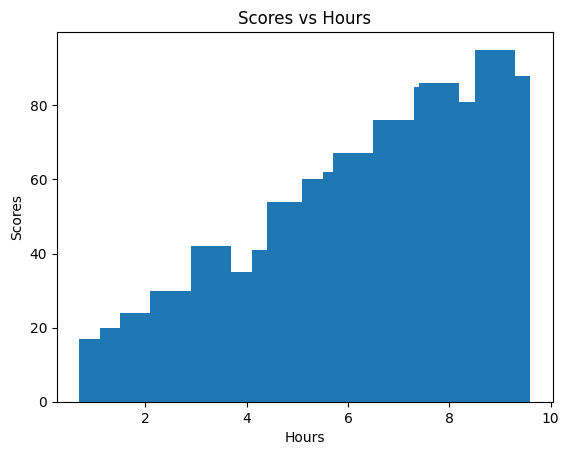

In [8]:
# Group the data by score and hours
grouped_data = df.groupby(['Hours', 'Scores']).size().reset_index(name='Count')

# Plotting the bar chart
plt.bar(grouped_data['Hours'],grouped_data['Scores'])
# plt.bar(range(len(grouped_data)), grouped_data['Count'])
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.title('Scores vs Hours')

# Display the chart
plt.show()

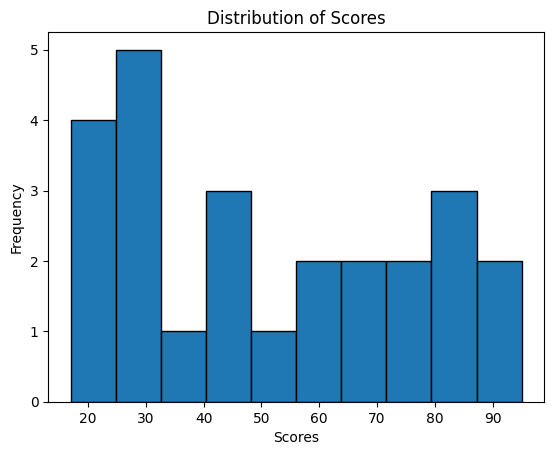

In [9]:
# Plotting the histogram
plt.hist(df['Scores'], bins=10, edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')

# Display the chart
plt.show()

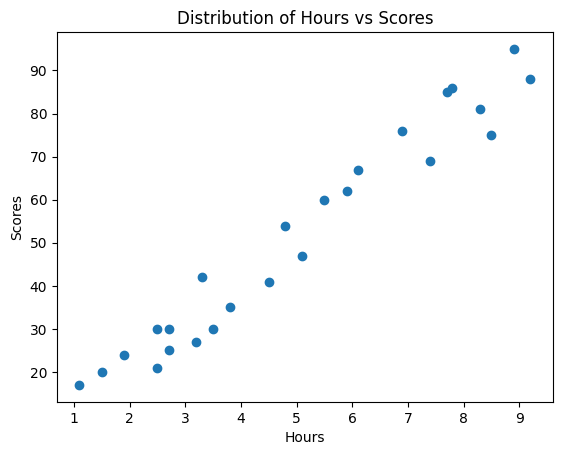

In [10]:
# Visualize distribution of data using scatter plot

# Plotting the scatter plot
plt.scatter(df["Hours"], df["Scores"])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Distribution of Hours vs Scores')

# Display the plot
plt.show()

In [11]:
# Prepare the data by splitting it into Training and Test set
from sklearn.model_selection import train_test_split


In [12]:
# Separate the features (X) and the target variable (y)
X = df[['Hours']]
y = df['Scores']

In [13]:
# Split the data into features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features (input variables)
y = df.iloc[:, -1]   # Target variable (output variable)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (20, 1) (20,)
Test set shape: (5, 1) (5,)


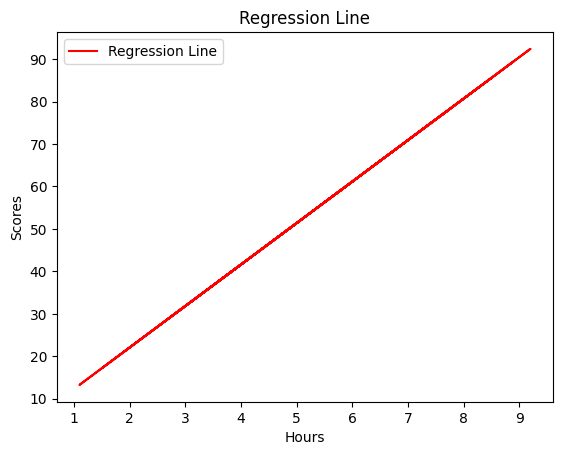

In [15]:
# Plot the regression line
from sklearn.linear_model import LinearRegression

# Create an instance of Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Get the predicted scores
y_pred = model.predict(X)

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Set the title, x-label, and y-label
plt.title("Regression Line")
plt.xlabel("Hours")
plt.ylabel("Scores")

# Display the legend
plt.legend()

# Display the plot
plt.show()




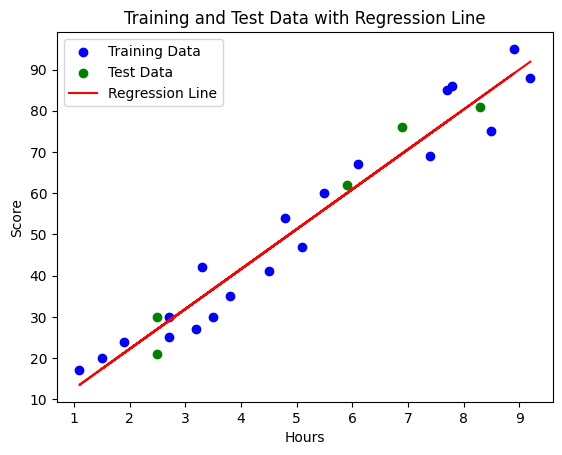

    Actual Score  Predicted Score
8             81        83.188141
16            30        27.032088
0             21        27.032088
23            76        69.633232
11            62        59.951153


In [16]:
# Plot the training and test data . Predict the score and compare predicted and actual score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Provide the URL of the CSV file
url = "https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(url)

# Split the data into features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features (input variable)
y = df.iloc[:, -1]   # Target variable (output variable)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get the predicted scores for training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Create a scatter plot of the training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Create a scatter plot of the test data
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Plot the regression line for training data
plt.plot(X_train, y_train_pred, color='red', label='Regression Line')

# Set the title, x-label, and y-label
plt.title("Training and Test Data with Regression Line")
plt.xlabel("Hours")
plt.ylabel("Score")

# Display the legend
plt.legend()

# Display the plot
plt.show()

# Compare predicted and actual scores
compare_df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_test_pred})
print(compare_df)


In [17]:
# Calculate R2 score for training and test sets
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R2 score for training set:", r2_train)
print("R2 score for test set:", r2_test)

R2 score for training set: 0.9491209376364416
R2 score for test set: 0.9678055545167994


In [18]:
# Predict the percentage grade of a student if study hours are 9.25

# Predict the percentage grade for study hours of 9.25
study_hours = [[9.25]]
predicted_grade = model.predict(study_hours)

# Print the predicted grade
print("Predicted grade for study hours of 9.25:", predicted_grade[0])

Predicted grade for study hours of 9.25: 92.38611528261494


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
# Evaluate the model: Calculate Mean absolute error, mean squared error, root mean squared error

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Separate the features (X) and the target variable (y)
X = df[['Hours']]
y = df['Scores']

# Create and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Generate predictions
y_pred = regressor.predict(X)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y, y_pred, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 4.972805319866375
Mean Squared Error (MSE): 28.882730509245466
Root Mean Squared Error (RMSE): 5.374265578592619


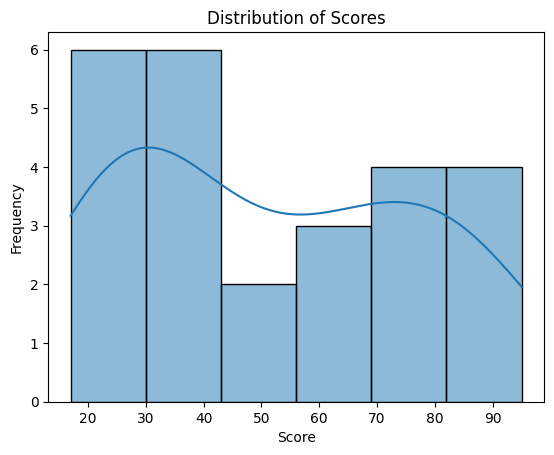

In [20]:
# Import seaborn and plot the distribution as well
# Plot the distribution of scores using seaborn
sns.histplot(data=df, x='Scores', kde=True)

# Set the title, x-label, and y-label
plt.title("Distribution of Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")

# Display the plot
plt.show()


In [21]:
# Print actual vs predicted percentage score



# Create a DataFrame to hold actual and predicted scores
compare_df = pd.DataFrame({'Actual Score': y, 'Predicted Score': y_pred})

# Print the DataFrame
print(compare_df)



    Actual Score  Predicted Score
0             21        26.923182
1             47        52.340271
2             27        33.766244
3             75        85.578002
4             30        36.698985
5             20        17.147378
6             88        92.421065
7             60        56.250592
8             81        83.622842
9             25        28.878343
10            85        77.757360
11            62        60.160913
12            41        46.474789
13            42        34.743825
14            17        13.237057
15            95        89.488324
16            30        26.923182
17            24        21.057700
18            67        62.116074
19            69        74.824618
20            30        28.878343
21            54        49.407530
22            35        39.631726
23            76        69.936717
24            86        78.734940


In [22]:
# Apply ridge and grid search to improvise your model

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Provide the URL of the CSV file
url = "https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(url)

# Split the data into features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features (input variable)
y = df.iloc[:, -1]   # Target variable (output variable)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of Ridge regression model
ridge = Ridge()

# Set up the parameter grid for GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Create a new Ridge model with the best hyperparameters
best_ridge = Ridge(alpha=best_alpha)

# Fit the model on the training data
best_ridge.fit(X_train, y_train)

# Get the predicted scores for the test data
y_test_pred = best_ridge.predict(X_test)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the best hyperparameters and RMSE
print("Best Alpha:", best_alpha)
print("RMSE:", rmse)


Best Alpha: 0.001
RMSE: 4.352431566398322
